In [35]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('new.csv')

In [3]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [4]:
df.shape

(2240, 29)

In [5]:
df.isnull().sum().sum()

np.int64(24)

In [7]:
df['MntWines'].head()

0    635
1     11
2    426
3     11
4    173
Name: MntWines, dtype: int64

In [9]:
dkt=df.filter(['Kidhome', 'Teenhome'], axis=1)
dkt

,Kidhome,Teenhome
0,0,0
1,1,1
2,0,0
3,1,0
4,1,0
...,...,...
2235,0,1
2236,2,1
2237,0,0
2238,0,1


In [10]:
df = df.dropna()

In [11]:
df.nunique()

ID                     2216
Year_Birth               59
Education                 5
Marital_Status            8
Income                 1974
Kidhome                   3
Teenhome                  3
Dt_Customer             662
Recency                 100
MntWines                776
MntFruits               158
MntMeatProducts         554
MntFishProducts         182
MntSweetProducts        176
MntGoldProds            212
NumDealsPurchases        15
NumWebPurchases          15
NumCatalogPurchases      14
NumStorePurchases        14
NumWebVisitsMonth        16
AcceptedCmp3              2
AcceptedCmp4              2
AcceptedCmp5              2
AcceptedCmp1              2
AcceptedCmp2              2
Complain                  2
Z_CostContact             1
Z_Revenue                 1
Response                  2
dtype: int64

In [17]:
df['Dt_Customer'].head()

0    04-09-2012
1    08-03-2014
2    21-08-2013
3    10-02-2014
4    19-01-2014
Name: Dt_Customer, dtype: object

In [18]:
df['Marital_Status'].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

In [21]:
parts = df['Dt_Customer'].str.split('-', n=3, expand=True)
df['day'] = parts[0].astype(int)
df['month'] = parts[1].astype(int)
df['year'] = parts[2].astype(int)

C:\Users\USER\AppData\Local\Temp\ipykernel_13136\3074089191.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['day'] = parts[0].astype(int)
C:\Users\USER\AppData\Local\Temp\ipykernel_13136\3074089191.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = parts[1].astype(int)
C:\Users\USER\AppData\Local\Temp\ipykernel_13136\3074089191.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See t

In [24]:
df.drop(['Z_CostContact', 'Z_Revenue', 'Dt_Customer'], axis=1, inplace=True)

C:\Users\USER\AppData\Local\Temp\ipykernel_13136\1229337656.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(['Z_CostContact', 'Z_Revenue', 'Dt_Customer'], axis=1, inplace=True)


In [25]:
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,day,month,year
0,5524,1957,Graduation,Single,58138.0,0,0,58,635,88,...,0,0,0,0,0,0,1,4,9,2012
1,2174,1954,Graduation,Single,46344.0,1,1,38,11,1,...,0,0,0,0,0,0,0,8,3,2014
2,4141,1965,Graduation,Together,71613.0,0,0,26,426,49,...,0,0,0,0,0,0,0,21,8,2013
3,6182,1984,Graduation,Together,26646.0,1,0,26,11,4,...,0,0,0,0,0,0,0,10,2,2014
4,5324,1981,PhD,Married,58293.0,1,0,94,173,43,...,0,0,0,0,0,0,0,19,1,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,46,709,43,...,0,0,0,0,0,0,0,13,6,2013
2236,4001,1946,PhD,Together,64014.0,2,1,56,406,0,...,0,0,0,1,0,0,0,10,6,2014
2237,7270,1981,Graduation,Divorced,56981.0,0,0,91,908,48,...,0,1,0,0,0,0,0,25,1,2014
2238,8235,1956,Master,Together,69245.0,0,1,8,428,30,...,0,0,0,0,0,0,0,24,1,2014


In [27]:
floats, objects =  [], []
for col in df.columns:
    if df[col].dtype == object:
        objects.append(col)
    elif df[col].dtype == float:
        floats.append(col)

print(objects)
print(floats)
        

['Education', 'Marital_Status']
['Income']


In [32]:
for col in df.columns:
    if df[col].dtype == object:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])

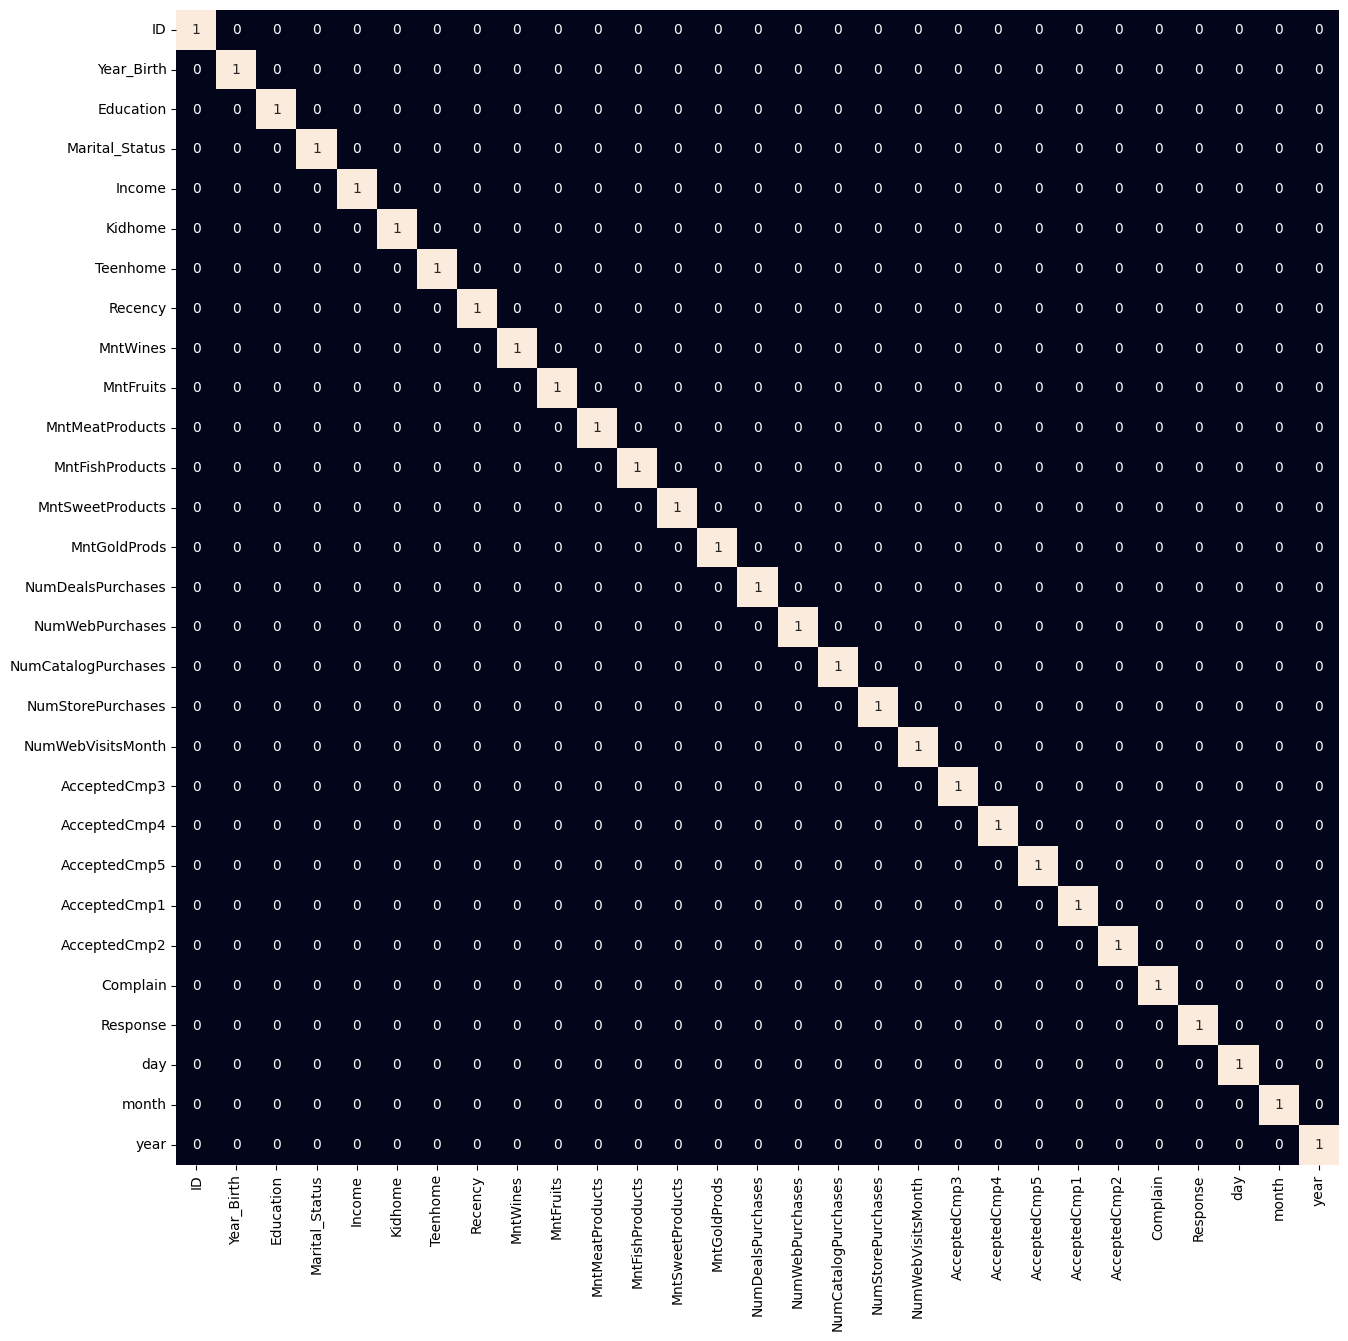

In [33]:
plt.figure(figsize=(15, 15))
sns.heatmap(df.corr() > 0.8, annot=True, cbar=False)
plt.show()

In [36]:
scaler = StandardScaler()
data = scaler.fit_transform(df)

In [38]:
from sklearn.manifold import TSNE

C:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\matplotlib\collections.py:999: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


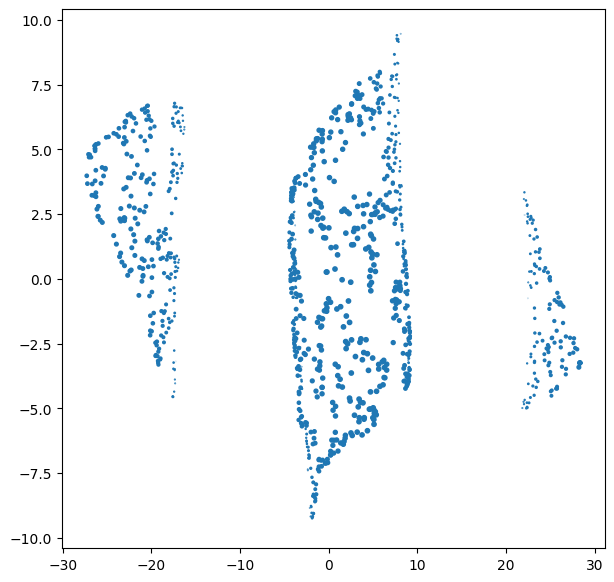

In [40]:
model = TSNE(n_components=3, random_state=0)
tsne_data=model.fit_transform(df)
plt.figure(figsize=(7,7))
plt.scatter(tsne_data[:,0], tsne_data[:,1], tsne_data[:,2])

plt.show()

In [41]:
from sklearn.cluster import KMeans

In [44]:
error = []
for K in range(1, 21):
    model = KMeans(init='k-means++',
                   n_clusters=K,
                   max_iter=500,
                   random_state=30)
    model.fit(df)
    error.append(model.inertia_)

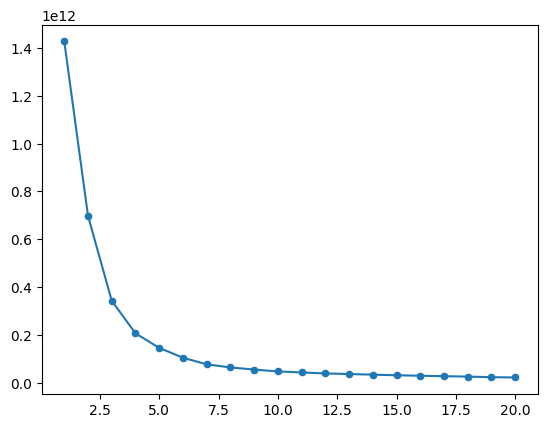

In [45]:
sns.lineplot(x=range(1,21), y=error)
sns.scatterplot(x=range(1,21), y=error)
plt.show()

In [46]:
model = KMeans(init='k-means++',
                   n_clusters=4,
                   max_iter=500,
                   random_state=30)
segment = model.fit_predict(df)

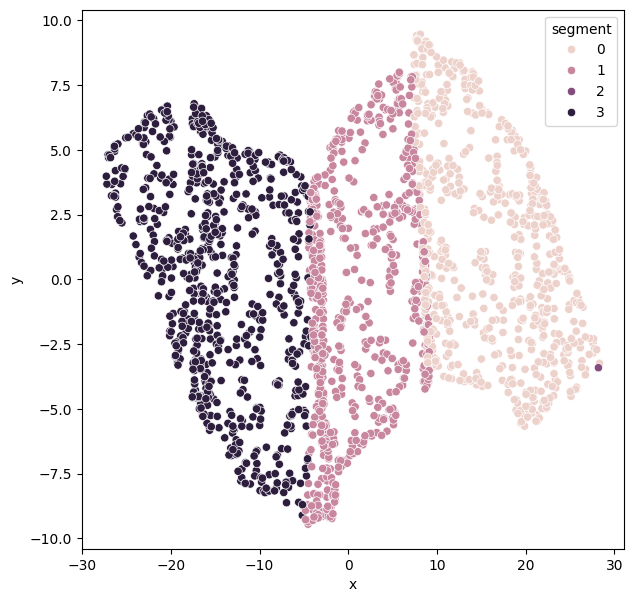

In [52]:
plt.figure(figsize=(7,7))

df_tsne = pd.DataFrame({'x': tsne_data[:,0], 'y': tsne_data[:,1], 'segment': segment})
sns.scatterplot(x='x', y='y', hue='segment', data=df_tsne)
plt.show()